In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Importing training data

In [2]:
train_data = pd.read_csv('test/CoRoT-2b_1.6.txt')
print('TRAIN DATA:\n', train_data)
test_data = pd.read_csv('test/CoRoT-2b_1.7.txt')
print('TEST DATA:\n', test_data)

TRAIN DATA:
             epoch    depth    error  transit
0    2.457988e+06 -1.30186  0.00192        0
1    2.457988e+06 -1.30184  0.00197        0
2    2.457988e+06 -1.30193  0.00203        0
3    2.457988e+06 -1.30466  0.00201        0
4    2.457988e+06 -1.30791  0.00214        0
..            ...      ...      ...      ...
114  2.457989e+06 -1.29765  0.00245        0
115  2.457989e+06 -1.29141  0.00253        0
116  2.457989e+06 -1.29071  0.00270        0
117  2.457989e+06 -1.28883  0.00268        0
118  2.457989e+06 -1.29269  0.00254        0

[119 rows x 4 columns]
TEST DATA:
            epoch    depth    error  transit
0   2.457920e+06  0.25027  0.00136        0
1   2.457920e+06  0.24401  0.00151        0
2   2.457920e+06  0.24949  0.00115        0
3   2.457920e+06  0.24237  0.00135        0
4   2.457920e+06  0.24186  0.00218        0
..           ...      ...      ...      ...
76  2.457921e+06  0.24834  0.00153        0
77  2.457921e+06  0.24393  0.00160        0
78  2.457921e+0

In [3]:
def get_cluster(train_data):

    # Create proportional feature
    train_data['depth_prop'] = train_data['depth'] / train_data['depth'].values[0]

    # Get Cumulative Differences
    train_data['depth_prop_diff'] = train_data['depth_prop'] - train_data['depth_prop'].shift(-3)

    # Create 5-period sma
    train_data['depth_prop_sma5'] = train_data['depth_prop'].rolling(window=5).mean()

    train_data['depth_prop']
    print(train_data['depth_prop'].shape)


    # Apply kmeans
    from sklearn.cluster import KMeans

    from sklearn.cluster import AgglomerativeClustering

    # Select non-nan
    mask = ~train_data.isna()
    mask = mask.all(axis=1)

    train_data = train_data.loc[mask]

    # MaxMin Scaling between 0->1
    X = train_data
    norm = MinMaxScaler()
    X = norm.fit(X).transform(X)

    # Applying Unsupervised Learning for Labels
    kmeans = AgglomerativeClustering(n_clusters=n_clusters).fit(X)


    # Dropping nans from features
    if kmeans.labels_.shape[0] != train_data.shape[0]:
        train_data = train_data.loc[mask]
        kmeans.labels_ = kmeans.labels_[mask]
        kmeans.labels_ = kmeans.labels_[mask]

    # Settings Labels as color
    train_data['labels'] = kmeans.labels_
    color_map = {'0.0':'red',
                '1.0':'blue',
                '2.0':'green',
                '3.0':'gray',
                '4.0':'yellow'}
    train_data['color'] = train_data.apply(lambda x: color_map[str(x['labels'])] ,axis=1)

    cmap = plt.get_cmap("magma")
    sns.scatterplot(x=range(len(train_data['depth'])),
                y=train_data['depth']*-1,hue=train_data['labels'])
    
    plt.show()




(81,)


/home/dylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


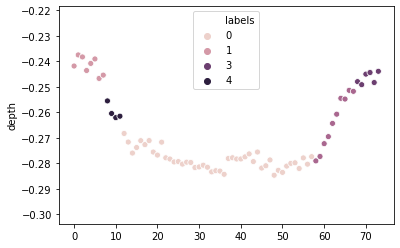

In [5]:
get_cluster(test_data)